In [57]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [115]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [116]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [118]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [117]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [59]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [92]:
#SIGN UP DATE AND TRANSACTION DATE MISMATCH FOR 191 TRANSACTIONS
#SINCE THIS IS A SIGNIFICANT NUMBER FOR THE DATASET (191 OUT OF 1000) NOT DROPPING THOSE ROWS
#ASSUMED SIGNUP DATE AS THE TRANSACTION DATE FOR THOSE TRANSACTIONS

In [119]:
customers.info

<bound method DataFrame.info of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>

In [120]:
products.info

<bound method DataFrame.info of    ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography        Books   44.12
3       P004            BookWorld Rug   Home Decor   95.69
4       P005          TechPro T-Shirt     Clothing  429.31
..       ...                      ...          ...     ...
95      P096     SoundWave Headphones  Electronics  307.47
96      P097       BookWorld Cookbook        Books  319.34
97      P098         SoundWave Laptop  Electronics  299.93
98      P099   SoundWave Mystery Book        Books  354.29
99      P100        HomeSense Sweater     Clothing  126.34

[100 rows x 4 columns]>

In [121]:
transactions.info

<bound method DataFrame.info of     TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067   2024-04-25 7:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037   2024-10-24 8:30:27         1   
996        T00759      C0059      P037   2024-06-04 2:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue   Price  
0        300.68  300.68  
1        300.68  300.68  
2        300.

In [123]:
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
merged.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

Revenue by Region:
          Region  TotalValue
3  South America   219352.56
1         Europe   166254.63
2  North America   152313.40
0           Asia   152074.97

Transaction Counts by Region:
          Region  TransactionCount
0  South America               304
1  North America               244
2         Europe               234
3           Asia               218

Customer Counts by Region:
          Region  CustomerCount
0           Asia             44
1         Europe             50
2  North America             46
3  South America             59


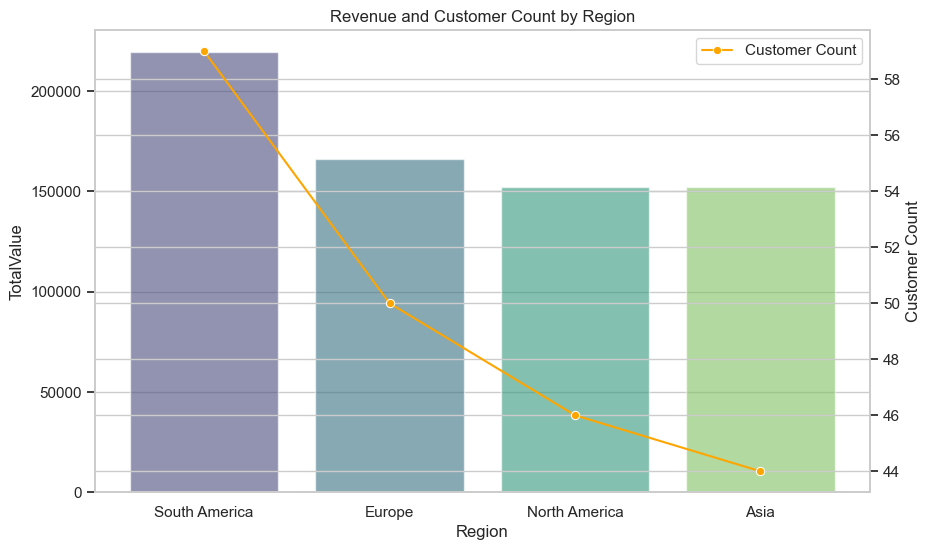

Combined Data by Region:
          Region  TotalValue  TransactionCount  CustomerCount
0  South America   219352.56               304             59
1         Europe   166254.63               234             50
2  North America   152313.40               244             46
3           Asia   152074.97               218             44


In [89]:
trans_cust = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
region_revenue = trans_cust.groupby('Region')['TotalValue'].sum().reset_index().sort_values(by='TotalValue', ascending=False)
region_counts = trans_cust['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'TransactionCount']
region_customers = trans_cust.groupby('Region')['CustomerID'].nunique().reset_index()
region_customers.columns = ['Region', 'CustomerCount']

print("Revenue by Region:")
print(region_revenue)
print("\nTransaction Counts by Region:")
print(region_counts)
print("\nCustomer Counts by Region:")
print(region_customers)

combined_data = region_revenue.merge(region_customers, on='Region')



plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data, x='Region', y='TotalValue', palette='viridis', label='Revenue (USD)', alpha=0.6)
ax2 = plt.gca().twinx()
sns.lineplot(data=combined_data, x='Region', y='CustomerCount', marker='o', color='orange', ax=ax2, label='Customer Count')
plt.title('Revenue and Customer Count by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
ax2.set_ylabel('Customer Count')
plt.xticks(rotation=45)

# Add legends to the plot
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


combined_data = region_revenue.merge(region_counts, on='Region').merge(region_customers, on='Region')

# Print the combined data table
print("Combined Data by Region:")
print(combined_data)

In [61]:
order_stats = transactions['TotalValue'].describe()
print("Overall Order Value Statistics:")
print(order_stats)

order_threshold = transactions['TotalValue'].quantile(0.67)
top_orders = transactions[transactions['TotalValue'] >= order_threshold]
top_orders_value = top_orders['TotalValue'].sum()
percentage_top_orders = (top_orders_value / transactions['TotalValue'].sum()) * 100

print("\nTop 33% Orders Threshold: {:.2f}".format(order_threshold))
print("Revenue from Top 33% Orders: ${:,.2f}".format(top_orders_value))
print("Percentage Contribution: {:.2f}%".format(percentage_top_orders))

Overall Order Value Statistics:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64

Top 33% Orders Threshold: 894.68
Revenue from Top 33% Orders: $427,317.47
Percentage Contribution: 61.93%


Monthly Sales Summary:
    Month  TransactionCount  TotalRevenue
0       1               107      66376.39
1       2                77      51459.27
2       3                80      47828.73
3       4                86      57519.06
4       5                86      64527.74
5       6                69      48771.18
6       7                96      71366.39
7       8                94      63436.74
8       9                96      70603.75
9      10                70      47063.22
10     11                57      38224.37
11     12                82      62818.72


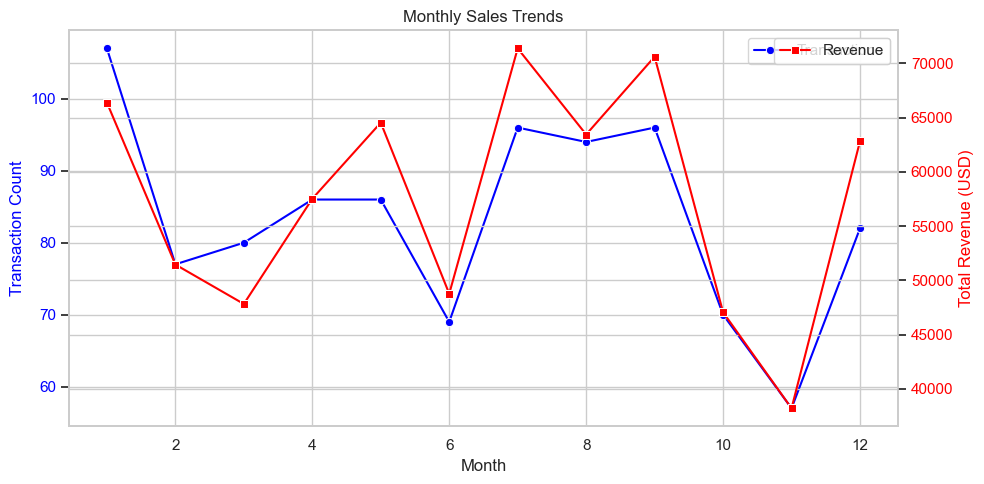

In [62]:
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Year'] = transactions['TransactionDate'].dt.year

monthly_sales = transactions.groupby('Month').agg({
    'TransactionID': 'nunique',
    'TotalValue': 'sum'
}).reset_index()
monthly_sales.columns = ['Month', 'TransactionCount', 'TotalRevenue']

print("Monthly Sales Summary:")
print(monthly_sales)

fig, ax1 = plt.subplots(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TransactionCount', marker='o', ax=ax1, label='Transactions', color='blue')
ax1.set_ylabel('Transaction Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='Month', y='TotalRevenue', marker='s', ax=ax2, label='Revenue', color='red')
ax2.set_ylabel('Total Revenue (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Monthly Sales Trends')
plt.xlabel('Month')
fig.tight_layout()
plt.show()

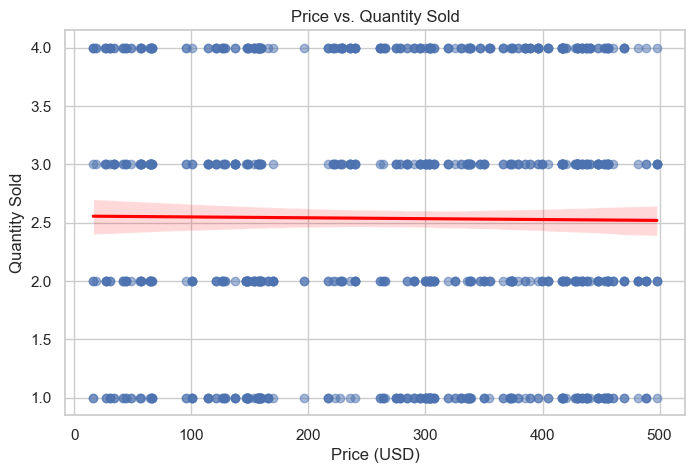

Pearson Correlation between Price and Quantity Sold: -0.01


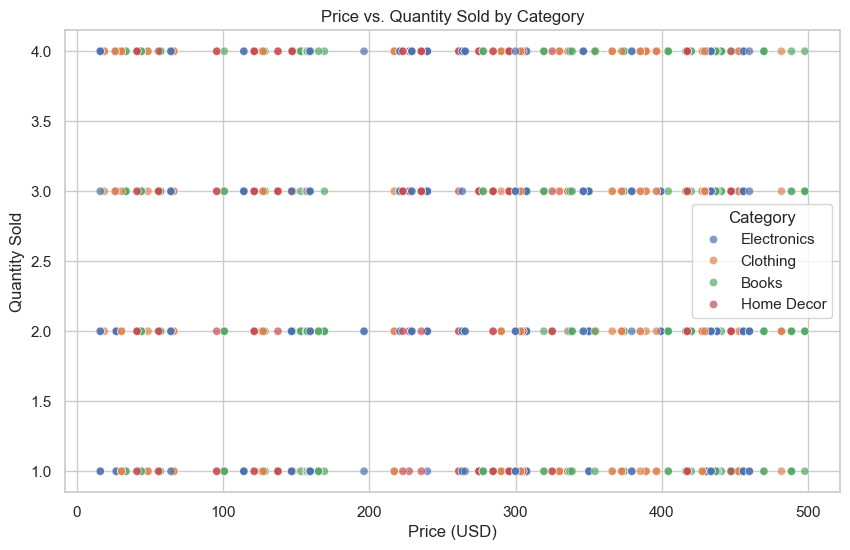

In [63]:
plt.figure(figsize=(8, 5))
sns.regplot(data=transactions, x='Price', y='Quantity', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity Sold')
plt.show()

corr = transactions[['Price', 'Quantity']].corr().iloc[0, 1]
print("Pearson Correlation between Price and Quantity Sold: {:.2f}".format(corr))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=trans_prod, x='Price', y='Quantity', hue='Category', alpha=0.7)
plt.title('Price vs. Quantity Sold by Category')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity Sold')
plt.legend(title='Category')
plt.show()

In [64]:
cust_txn_count = transactions.groupby('CustomerID').size()
repeat_customers = cust_txn_count[cust_txn_count > 1].count()
repeat_percentage = (repeat_customers / customers['CustomerID'].nunique()) * 100

print("Repeat Purchase Percentage: {:.2f}%".format(repeat_percentage))

customer_ltv = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_ltv = customer_ltv.merge(customers[['CustomerID', 'SignupDate']], on='CustomerID', how='left')

cutoff_date = pd.to_datetime("2023-01-01")
early_signups = customer_ltv[customer_ltv['SignupDate'] < cutoff_date]
recent_signups = customer_ltv[customer_ltv['SignupDate'] >= cutoff_date]

print("\nAverage Lifetime Value:")
print("Early Signups (< {}): ${:.2f}".format(cutoff_date.date(), early_signups['TotalValue'].mean()))
print("Recent Signups (>= {}): ${:.2f}".format(cutoff_date.date(), recent_signups['TotalValue'].mean()))


Repeat Purchase Percentage: 93.50%

Average Lifetime Value:
Early Signups (< 2023-01-01): $3528.75
Recent Signups (>= 2023-01-01): $3438.19


In [65]:
customer_revenue = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_revenue = customer_revenue.sort_values(by='TotalValue', ascending=False)
customer_revenue['Rank'] = customer_revenue['TotalValue'].rank(method='first', ascending=False)

cutoff_index = int(0.33 * len(customer_revenue))
high_value_customers = customer_revenue.head(cutoff_index)

print("Number of High-Value Customers: {} (approx. 33% of total)".format(high_value_customers.shape[0]))

last_txn = transactions.groupby('CustomerID')['TransactionDate'].max().reset_index()
last_txn.columns = ['CustomerID', 'LastTransactionDate']
customer_revenue = customer_revenue.merge(last_txn, on='CustomerID', how='left')
customer_revenue['DaysSinceLast'] = (datetime.now() - customer_revenue['LastTransactionDate']).dt.days

hv_recency = high_value_customers.merge(customer_revenue[['CustomerID', 'DaysSinceLast']], on='CustomerID', how='left')

print("\nHigh-Value Customer Recency (days since last transaction):")
print(hv_recency.describe())

Number of High-Value Customers: 65 (approx. 33% of total)

High-Value Customer Recency (days since last transaction):
         TotalValue      Rank  DaysSinceLast
count     65.000000  65.00000      65.000000
mean    5598.756923  33.00000      90.938462
std     1129.025677  18.90767      48.033152
min     4251.560000   1.00000      35.000000
25%     4802.240000  17.00000      48.000000
50%     5377.830000  33.00000      82.000000
75%     6044.630000  49.00000     123.000000
max    10673.870000  65.00000     268.000000


In [66]:
transactions['Week'] = transactions['TransactionDate'].dt.to_period('W').apply(lambda r: r.start_time)

basket_data_week = transactions.groupby(['CustomerID', 'Week'])['ProductID'].apply(list).reset_index(name='Products')

basket_data_week = basket_data_week[basket_data_week['Products'].apply(lambda x: len(x) > 1)]
print("Number of weekly baskets with >1 product:", basket_data_week.shape[0])

from sklearn.preprocessing import MultiLabelBinarizer
mlb_week = MultiLabelBinarizer()
basket_encoded_week = pd.DataFrame(mlb_week.fit_transform(basket_data_week['Products']),
                                   columns=mlb_week.classes_,
                                   index=basket_data_week.index)
print("Weekly basket one-hot encoded sample:")
print(basket_encoded_week.head())

# Apply Apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets_week = apriori(basket_encoded_week, min_support=0.01, use_colnames=True)
print("Frequent itemsets from weekly baskets (sample):")
print(frequent_itemsets_week.sort_values(by='support', ascending=False).head())

rules_week = association_rules(frequent_itemsets_week, metric="lift", min_threshold=1)
print("Association Rules (Top 5) from weekly baskets:")
print(rules_week.sort_values(by='lift', ascending=False).head())

Number of weekly baskets with >1 product: 36
Weekly basket one-hot encoded sample:
     P003  P004  P006  P007  P008  P010  P011  P013  P016  P017  ...  P075  \
37      0     0     0     0     0     0     0     0     0     0  ...     0   
41      0     0     0     0     0     0     0     0     0     0  ...     0   
126     0     0     0     0     0     0     0     0     0     0  ...     0   
131     0     0     0     0     0     0     0     0     0     0  ...     0   
159     0     0     0     0     0     0     0     0     0     0  ...     0   

     P076  P081  P083  P084  P086  P087  P096  P097  P100  
37      0     0     0     0     0     0     0     0     0  
41      0     0     0     0     0     0     0     0     0  
126     0     0     0     1     0     0     1     0     0  
131     0     0     0     0     0     0     0     0     0  
159     0     0     0     0     0     1     0     0     0  

[5 rows x 53 columns]
Frequent itemsets from weekly baskets (sample):
     support item

In [68]:
last_transaction = transactions.groupby('CustomerID')['TransactionDate'].max().reset_index()
last_transaction.columns = ['CustomerID', 'LastTransactionDate']
churn_threshold = transactions['TransactionDate'].max() - pd.DateOffset(months=6)
churned_customers = last_transaction[last_transaction['LastTransactionDate'] < churn_threshold]
churn_rate = (len(churned_customers) / customers['CustomerID'].nunique()) * 100
print("Churn Rate (inactive for 6+ months): {:.2f}%".format(churn_rate))


Churn Rate (inactive for 6+ months): 6.50%


In [79]:
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.dayofweek

sales_by_day = transactions.groupby('DayOfWeek')['TotalValue'].sum().reset_index()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day['DayOfWeek'] = sales_by_day['DayOfWeek'].map(dict(zip(range(7), days)))

print(sales_by_day)

   DayOfWeek  TotalValue
0     Monday   101984.33
1    Tuesday   108567.61
2  Wednesday   119203.15
3   Thursday    99202.71
4     Friday    87032.09
5   Saturday    81399.74
6     Sunday    92605.93


In [77]:
merged_data = transactions.merge(customers, on='CustomerID')

customer_sales = merged_data.groupby(['CustomerID', 'Region'])['TotalValue'].sum().reset_index()

threshold = customer_sales['TotalValue'].quantile(0.9)
high_value_customers = customer_sales[customer_sales['TotalValue'] >= threshold]

high_value_by_region = high_value_customers.groupby('Region')['TotalValue'].sum().reset_index()

print(high_value_by_region)

          Region  TotalValue
0           Asia    33136.92
1         Europe    16823.65
2  North America    28321.85
3  South America    59497.22


In [78]:
threshold_low = customer_sales['TotalValue'].quantile(0.1)
low_value_customers = customer_sales[customer_sales['TotalValue'] <= threshold_low]

low_value_by_region = low_value_customers.groupby('Region')['TotalValue'].sum().reset_index()

print(low_value_by_region)

          Region  TotalValue
0           Asia     4987.41
1         Europe     3203.87
2  North America     1451.39
3  South America     3558.76


In [75]:
products = pd.read_csv('Products.csv')

product_sales = transactions.merge(products, on='ProductID')

product_revenue = product_sales.groupby('ProductName')['TotalValue'].sum().reset_index()

total_revenue = product_revenue['TotalValue'].sum()
product_revenue['RevenuePercentage'] = (product_revenue['TotalValue'] / total_revenue) * 100

top_products = product_revenue.sort_values(by='RevenuePercentage', ascending=False)

print(top_products.head(10))  # Top 10 products

                ProductName  TotalValue  RevenuePercentage
9     ActiveWear Smartwatch    39096.97           5.666264
47     SoundWave Headphones    25211.64           3.653884
52          SoundWave Novel    24507.90           3.551892
4         ActiveWear Jacket    22712.56           3.291697
6            ActiveWear Rug    22314.43           3.233996
58       TechPro Headphones    19513.80           2.828105
15       BookWorld Cookbook    19221.99           2.785814
21        BookWorld Sweater    18743.79           2.716509
64         TechPro Textbook    18267.96           2.647547
2   ActiveWear Cookware Set    18083.73           2.620847


Text(0, 0.5, 'Product Name')

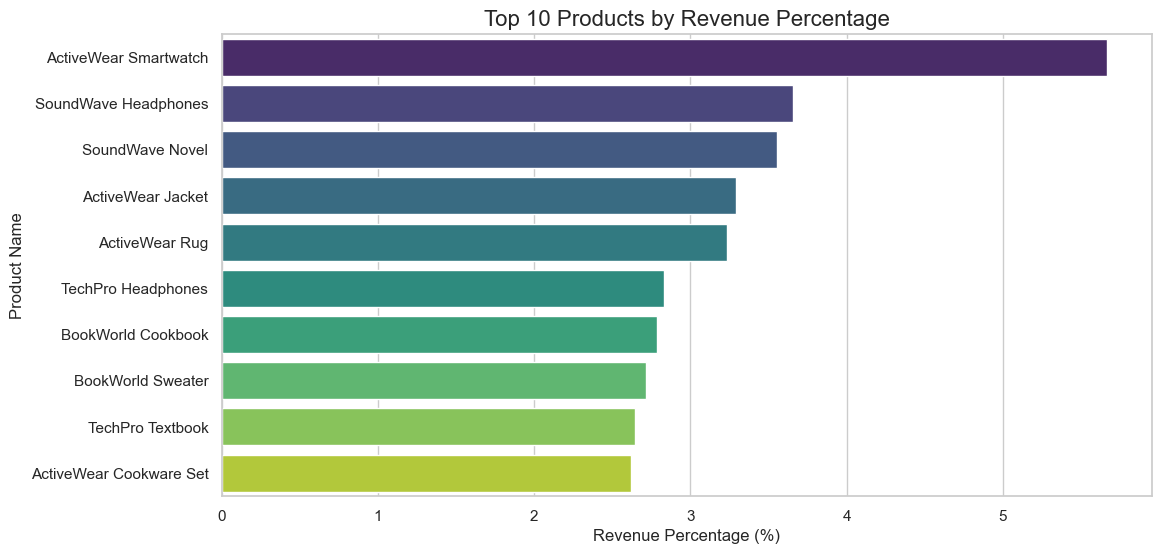

In [126]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='RevenuePercentage', y='ProductName', data=top_products.head(10), palette='viridis')

plt.title('Top 10 Products by Revenue Percentage', fontsize=16)
plt.xlabel('Revenue Percentage (%)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)


In [90]:
merged_data = transactions.merge(customers, on="CustomerID")

customer_orders = merged_data.groupby(["CustomerID", "Region"]).agg(
    total_orders=("TransactionID", "count"),
    total_money_spent=("TotalValue", "sum")
).reset_index()

top_customers_by_orders = customer_orders.nlargest(10, "total_orders")  # Change 10 to any number you want
print("Top Customers by Number of Orders:")
print(top_customers_by_orders)

top_customers_by_spent = customer_orders.nlargest(10, "total_money_spent")  # Change 10 to any number you want
print("\nTop Customers by Money Spent:")
print(top_customers_by_spent)


Top Customers by Number of Orders:
    CustomerID         Region  total_orders  total_money_spent
108      C0109  North America            11            5487.25
155      C0156  North America            11            7634.45
7        C0008  North America            10            4271.61
64       C0065  North America            10            7663.70
140      C0141         Europe            10           10673.87
174      C0175           Asia            10            6210.53
74       C0075         Europe             9            5848.97
83       C0084           Asia             9            4441.10
92       C0093           Asia             9            5294.99
146      C0147  South America             9            2948.44

Top Customers by Money Spent:
    CustomerID         Region  total_orders  total_money_spent
140      C0141         Europe            10           10673.87
53       C0054           Asia             8            8040.39
64       C0065  North America            10         

In [101]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Month,Year,Week,DayOfWeek,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,8,2024,2024-08-19,6,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,5,2024,2024-05-27,0,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,4,2024,2024-04-22,3,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,3,2024,2024-03-25,1,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,3,2024,2024-03-18,3,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [102]:
region_category = merged_data.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

pivot_region_category = region_category.pivot(index='Region', columns='Category', values='Quantity').fillna(0)

pivot_region_category

Category,Books,Clothing,Electronics,Home Decor
Region,,,,
Asia,120,166,132,142
Europe,165,119,144,167
North America,155,147,153,138
South America,241,158,198,192


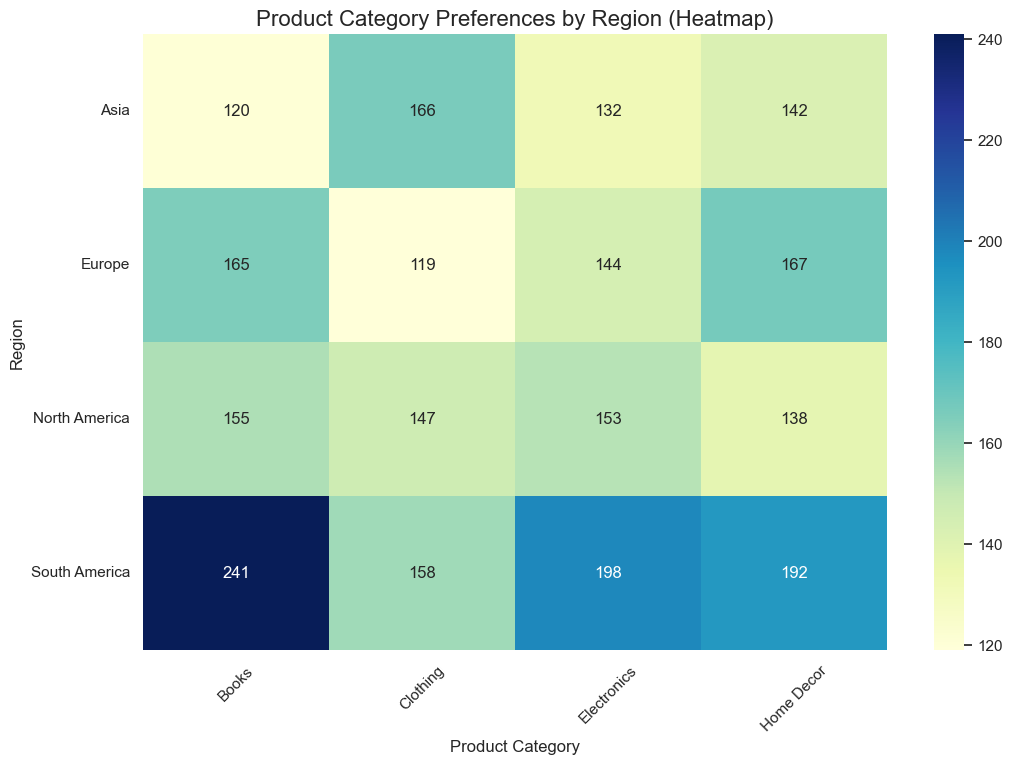

In [100]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_region_category, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Product Category Preferences by Region (Heatmap)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

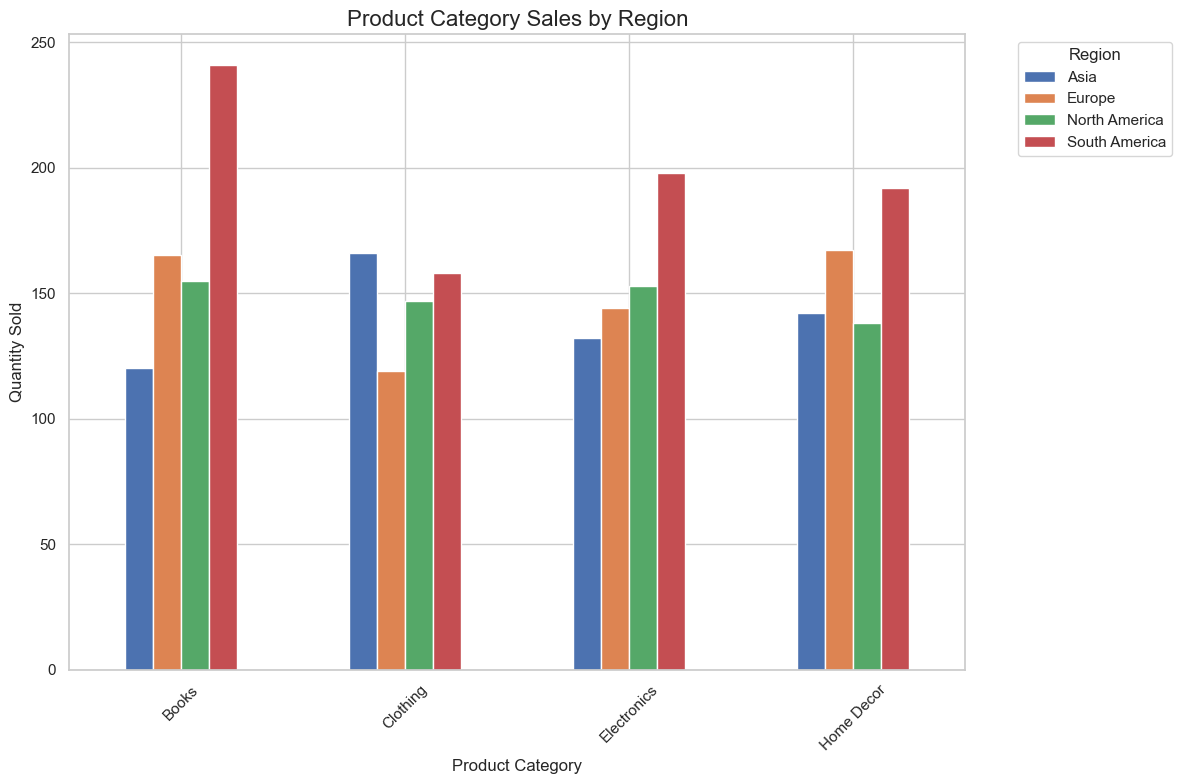

In [112]:
pivot_data = region_category.pivot_table(index='Category', columns='Region', values='Quantity', aggfunc='sum')

pivot_data.plot(kind='bar', figsize=(12, 8))

plt.title('Product Category Sales by Region', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
